In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import glob
from datetime import *
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = "drive/MyDrive/Hackathon - Air Quality Notebooks/Data"

dfs = []
for i in range(0, 6):
  tmp_df = pd.read_csv(f'{PATH}/data{i:02d}.csv', sep=',')
  dfs.append(tmp_df)
df = pd.concat(dfs)

In [ ]:
naDropped = df.dropna(subset = ['parameter'])

# Convert Timestamp String to DateTime

In [ ]:
naDropped['timestamp'] = pd.to_datetime(naDropped['timestamp'])
# df = df.sort_values("timestamp")

<ipython-input-9-2e6add1dcacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naDropped['timestamp'] = pd.to_datetime(naDropped['timestamp'])


In [ ]:
data_pivoted = pd.pivot_table(naDropped, index=["timestamp", "device_id", 'latitude', 'longitude'], values="value", columns="parameter")

In [ ]:
data_pivoted

,,,parameter,Humidity,PM 1,PM 10,PM 2.5,Temperature
timestamp,device_id,latitude,longitude,,,,,
2022-01-01 00:00:18.085000+01:00,97,-1.298294,36.790870,NaN,17.67,32.00,27.0,NaN
2022-01-01 00:00:24.050000+01:00,97,-1.298294,36.790870,94.4,NaN,NaN,NaN,16.5
2022-01-01 00:00:54.483000+01:00,103,-1.261000,36.782000,NaN,19.50,40.25,32.5,NaN
2022-01-01 00:00:55.390000+01:00,38,-1.298294,36.790870,NaN,25.00,47.00,39.0,NaN
2022-01-01 00:00:59.738000+01:00,38,-1.298294,36.790870,99.9,NaN,NaN,NaN,18.2
...,...,...,...,...,...,...,...,...
2022-09-10 09:19:28.099000+01:00,72,-1.265495,36.856859,NaN,24.00,NaN,NaN,NaN
2022-09-10 09:19:28.100000+01:00,72,-1.265495,36.856859,NaN,NaN,48.40,39.0,NaN
2022-09-10 09:19:51.687000+01:00,105,-1.296000,36.776000,61.0,NaN,NaN,NaN,22.7


In [ ]:
data_pivoted.reset_index(inplace=True)

In [ ]:
mask = data_pivoted['device_id'] != data_pivoted['device_id'].shift()
time_diff = (data_pivoted['timestamp'] - data_pivoted['timestamp'].shift()).fillna(pd.Timedelta(seconds=0))
groups = (time_diff > pd.Timedelta(seconds=30)).cumsum()

result = data_pivoted.groupby([mask.cumsum(), groups]).agg({'device_id':'first', 'timestamp':'first','Humidity': 'first', 'Temperature': 'first', 'PM 1': 'first', 'PM 2.5': 'first', 'PM 10': 'first', 'longitude':'first', 'latitude':'first'})

# You can now use 'timestamp' and 'device_id' as indices again if needed
# result.set_index(['timestamp', 'device_id'], inplace=True)

In [ ]:
result['PM 1'].fillna(value=result['PM 1'].mean(), inplace=True)
result['PM 2.5'].fillna(value=result['PM 2.5'].mean(), inplace=True)
result['PM 10'].fillna(value=result['PM 10'].mean(), inplace=True)
result['Humidity'].fillna(value=result['Humidity'].mean(), inplace=True)
result['Temperature'].fillna(value=result['Temperature'].mean(), inplace=True)

In [ ]:
result

,parameter,device_id,timestamp,Humidity,Temperature,PM 1,PM 2.5,PM 10,longitude,latitude
device_id,timestamp,,,,,,,,,
1,0,97,2022-01-01 00:00:18.085000+01:00,94.400000,16.500000,17.670000,27.000000,32.000000,36.790870,-1.298294
2,1,103,2022-01-01 00:00:54.483000+01:00,72.069244,23.893087,19.500000,32.500000,40.250000,36.782000,-1.261000
3,1,38,2022-01-01 00:00:55.390000+01:00,99.900000,18.200000,25.000000,39.000000,47.000000,36.790870,-1.298294
4,2,54,2022-01-01 00:02:05.694000+01:00,59.000000,24.000000,10.237705,0.000000,0.000000,36.790870,-1.298294
5,3,97,2022-01-01 00:02:50.059000+01:00,94.400000,16.500000,17.200000,29.000000,31.000000,36.790870,-1.298294
...,...,...,...,...,...,...,...,...,...,...
1552301,223221,27,2022-09-10 09:19:23.118000+01:00,72.069244,23.893087,26.000000,41.250000,53.000000,36.824679,-1.288985
1552302,223221,72,2022-09-10 09:19:28.099000+01:00,72.069244,23.893087,24.000000,39.000000,48.400000,36.856859,-1.265495
1552303,223221,105,2022-09-10 09:19:51.687000+01:00,61.000000,22.700000,10.237705,14.676135,16.235725,36.776000,-1.296000


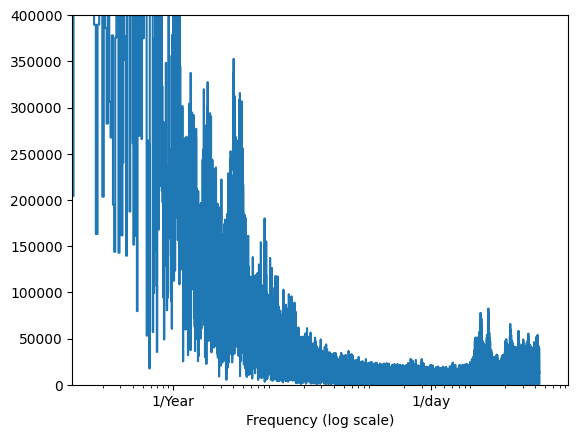

In [ ]:
# TODO: Test data on ensemble model (with NaN values) and neural networks with NaN replaced with mean value.
fftTest = df.copy()
# fftTest['PM 2.5'].fillna(value=fftTest['PM 2.5'].mean(), inplace=True)
values = fftTest[fftTest['parameter'] == "PM 10"]['value']
fft = tf.signal.rfft(values)

f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(values)
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [ ]:
result['timestamp'] = result['timestamp'].map(pd.Timestamp.timestamp)

In [ ]:
column_indices = {name: i for i, name in enumerate(result.columns)}

n = len(result)
train_df = result[0:int(n*0.7)]
val_df = result[int(n*0.7):int(n*0.9)]
test_df = result[int(n*0.9):]

num_features = result.shape[1]

In [ ]:
# TODO: Try with moving average
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

ValueError: ignored

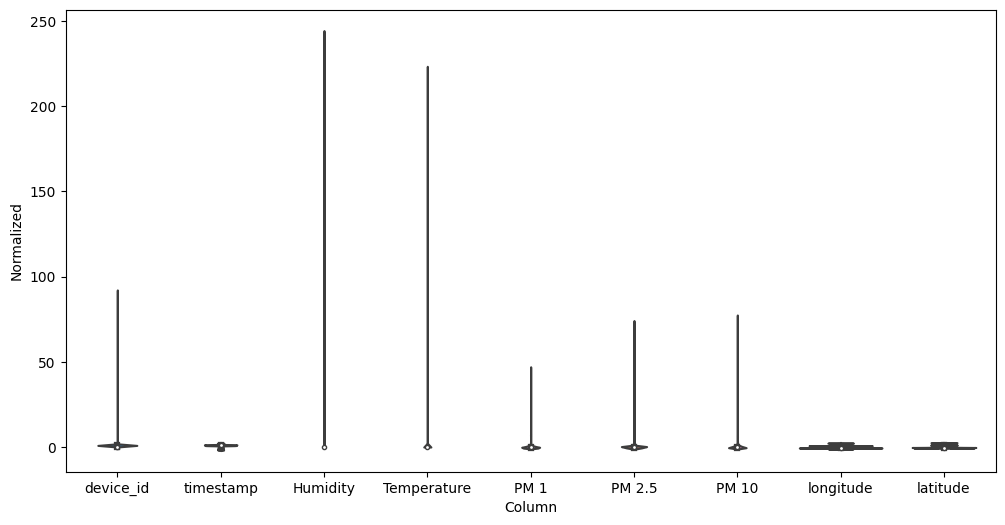

In [ ]:
df_std = (result - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
def plot(self, model=None, plot_col='PM 1', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=["PM 1"])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['PM 1']

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['PM 1'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['PM 1']

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
CONV_WIDTH = 3

conv_window = WindowGenerator(input_width=CONV_WIDTH, label_width=1, shift=1, label_columns=["PM 1"])
conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['PM 1']

Text(0.5, 1.0, 'Given 3 hours of input, predict 1 hour into the future.')

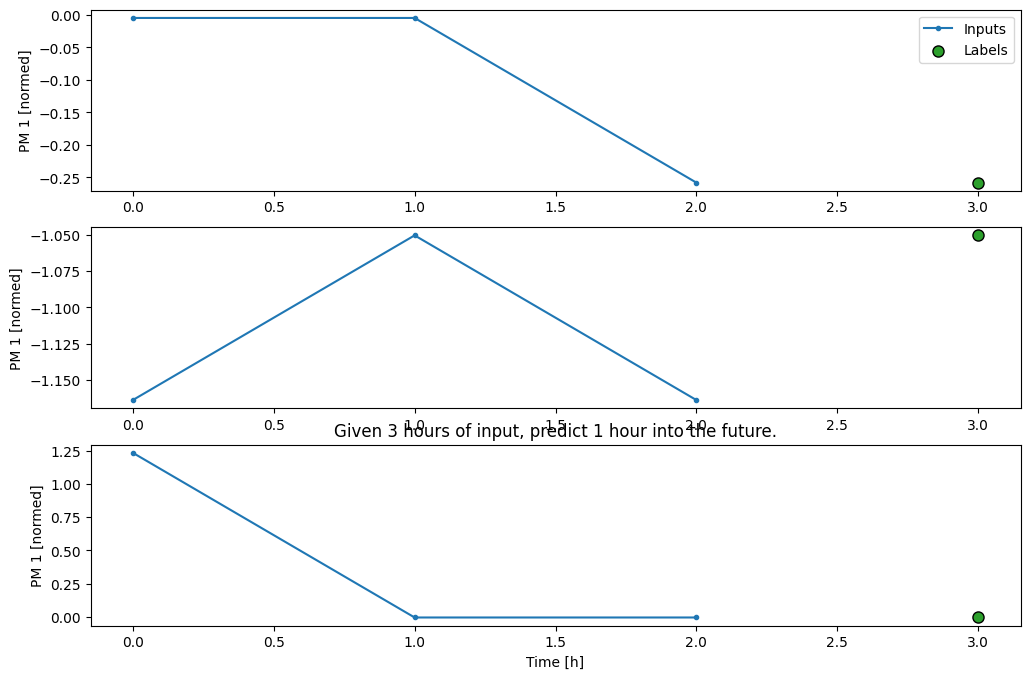

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of input, predict 1 hour into the future.")

## RNNs On Multistep

In [ ]:
wideMulti_window = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns=["PM 1", "PM 2.5", "PM 10"])

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(64, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history_rnn = compile_and_fit(lstm_model, wideMulti_window)

val_performance["RNN"] = lstm_model.evaluate(wideMulti_window.val)
performance["RNN"] = lstm_model.evaluate(wideMulti_window.test, verbose=0)

Epoch 1/20
 7197/37428 [====>.........................] - ETA: 12:06 - loss: 0.5895 - mean_absolute_error: 0.3954

ValueError: ignored

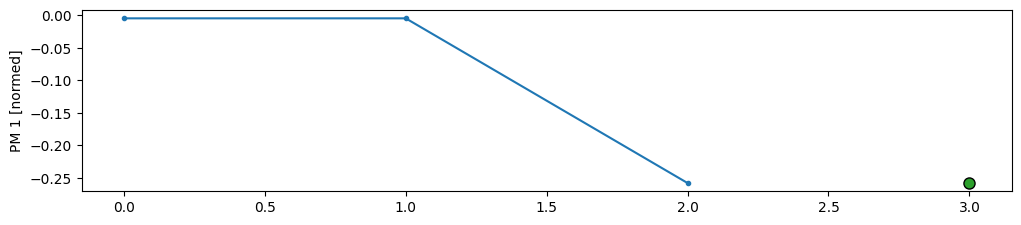

In [ ]:
wideMulti_window.plot(lstm_model)

In [7]:
def make_dataset(data, shift=1):
  total_window_size = len(data) + shift
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  return ds

def CleanData(df):
  naDropped = df.dropna(subset = ['parameter'])
  naDropped['timestamp'] = pd.to_datetime(naDropped['timestamp'])
  data_pivoted = pd.pivot_table(naDropped, index=["timestamp", "device_id", 'latitude', 'longitude'], values="value", columns="parameter")
  data_pivoted.reset_index(inplace=True)
  mask = data_pivoted['device_id'] != data_pivoted['device_id'].shift()
  time_diff = (data_pivoted['timestamp'] - data_pivoted['timestamp'].shift()).fillna(pd.Timedelta(seconds=0))
  groups = (time_diff > pd.Timedelta(seconds=30)).cumsum()

  result = data_pivoted.groupby([mask.cumsum(), groups]).agg({'device_id':'first', 'timestamp':'first','Humidity': 'first', 'Temperature': 'first', 'PM 1': 'first', 'PM 2.5': 'first', 'PM 10': 'first', 'longitude':'first', 'latitude':'first'})
  result['PM 1'].fillna(value=result['PM 1'].mean(), inplace=True)
  result['PM 2.5'].fillna(value=result['PM 2.5'].mean(), inplace=True)
  result['PM 10'].fillna(value=result['PM 10'].mean(), inplace=True)
  result['Humidity'].fillna(value=result['Humidity'].mean(), inplace=True)
  result['Temperature'].fillna(value=result['Temperature'].mean(), inplace=True)
  result['timestamp'] = result['timestamp'].map(pd.Timestamp.timestamp)

  return make_dataset(result)

data = pd.read_csv(f'drive/MyDrive/Hackathon - Air Quality Notebooks/HackathonProvidedCSV/data01_short.csv', sep=',')
CleanData(data)

<_BatchDataset element_spec=TensorSpec(shape=(None, None, 9), dtype=tf.float32, name=None)>